In [23]:
# **Part 1: Install dan Import Library yang Diperlukan**
!pip install mglearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn
from google.colab import files

In [24]:
# **Part 2: Load Dataset**
# Mengunggah dataset dari Google Colab
uploaded = files.upload()
df = pd.read_csv('HeartDisease.csv')

def preprocess_data(df):
    # Hapus baris dengan nilai kosong
    df = df.dropna()

    # Tentukan fitur (X) dan target (y)
    X = df.drop(columns=['num'])  # Semua kolom kecuali target
    y = (df['num'] > 0).astype(int)  # Konversi target ke biner (1: ada penyakit, 0: tidak)

    return X, y

X, y = preprocess_data(df)


Saving HeartDisease.csv to HeartDisease (7).csv


In [25]:
# **Part 3: Bagi Dataset dan Normalisasi**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
# **Part 4: Inisialisasi dan Pelatihan Model**
def train_model(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)

In [31]:
# **Part 5: Prediksi dan Evaluasi Model**
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # **Penjelasan Persamaan Matematis**
    # **Logistic Regression Function:**
    # $$ P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}} $$
    # Persamaan ini digunakan dalam regresi logistik untuk menghitung probabilitas suatu sampel diklasifikasikan ke dalam kelas positif (y=1).

    # **Akurasi:**
    # $$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$
    # Akurasi mengukur seberapa sering model memprediksi dengan benar.

    # **Presisi:**
    # $$ Precision = \frac{TP}{TP + FP} $$
    # Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dibuat oleh model.

    # **Recall:**
    # $$ Recall = \frac{TP}{TP + FN} $$
    # Recall mengukur seberapa banyak sampel positif yang benar-benar terdeteksi oleh model.

    # **F1-Score:**
    # $$ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$
    # F1-Score adalah rata-rata harmonik antara presisi dan recall, digunakan untuk menyeimbangkan keduanya.

    # **AUC-ROC:**
    # AUC-ROC adalah metrik yang mengukur seberapa baik model membedakan antara kelas positif dan negatif.

    print("\n=== Evaluasi Model ===")
    print(f"Akurasi  : {accuracy:.4f}")
    print(f"Presisi  : {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"AUC-ROC  : {auc:.4f}\n")

    return y_prob, auc

y_prob, auc = evaluate_model(model, X_test, y_test)


=== Evaluasi Model ===
Akurasi  : 0.8333
Presisi  : 0.8462
Recall   : 0.7857
F1-Score : 0.8148
AUC-ROC  : 0.9498



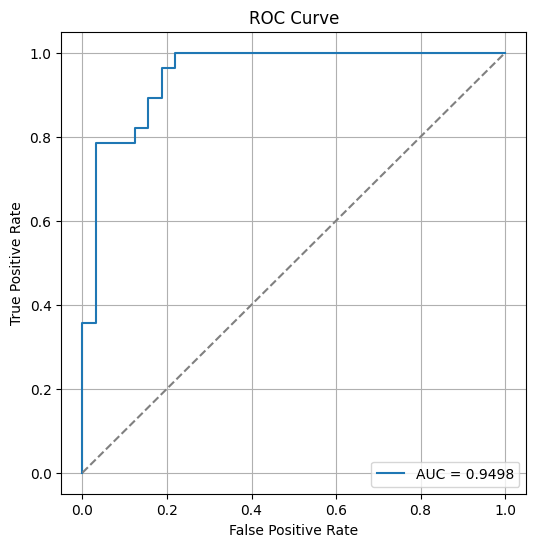

In [30]:
# **Part 6: Plot ROC Curve**
def plot_roc_curve(y_test, y_prob, auc):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve(y_test, y_prob, auc)